<a href="https://colab.research.google.com/github/Martin-William/Wills-Code/blob/main/CondensedCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports packages for below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as s


Text(41, 11, 'R')

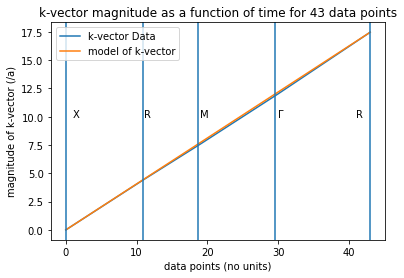

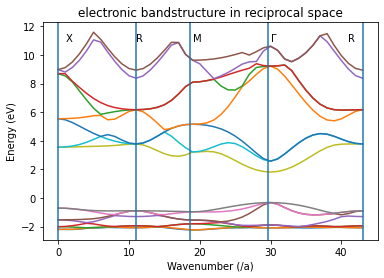

In [8]:
#gets the gile from my github and reads it into a 2D array
#! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/LED1%202_3_2022.csv
CA2Data = np.loadtxt('CA2Data.csv')

#splits the data into a 1D array taken from the first column and a 2D array of the rest of the data
a = CA2Data[:,0]
b = CA2Data[:,1:]

#plots the data from the 1D array and sets up the start and end vertical lines, X and R.
plt.figure(0)
plt.plot(a, label = 'k-vector Data') 
#ploting line y=mx+c to model the data
x = np.linspace(0,43,10000)
y=(1.7468757/4.3)*x
plt.plot(x,y, label = 'model of k-vector')

#starting at x = 0, y = 0 but setting up for finding the points of the ends of the k vectors by its length
x1=((4.3*np.pi*(0))/1.7468757)
#first k-vector has length of PI*root2, so the x value of our graph coresponding to y = PI is ploted as a vertical line denoting the first point R
x2=((4.3*np.pi*(np.sqrt(2)))/1.7468757)
#second k-vector is length 1 so adding to previous gives the next point, repeated for other points of our k vector
x3=((4.3*np.pi*(np.sqrt(2)+1))/1.7468757)
x4=((4.3*np.pi*(2*np.sqrt(2)+1))/1.7468757)
x5=((4.3*np.pi*(2*np.sqrt(2)+1+np.sqrt(3)))/1.7468757)

plt.axvline(x1)
plt.axvline(x2)
plt.axvline(x3)
plt.axvline(x4)
plt.axvline(x5)

#formatting
plt.title('k-vector magnitude as a function of time for 43 data points')
plt.legend()
plt.xlabel('data points (no units)')
plt.ylabel('magnitude of k-vector (/a)')
#adding lables to the vertical seperation lines
plt.annotate('X',xy=(1,10))
plt.annotate('R',xy=(11,10))
plt.annotate('M',xy=(19,10))
plt.annotate('Γ',xy=(30,10))
plt.annotate('R',xy=(41,10))

#plotted the second set of the data again adding in the ends of the k- vectors            
plt.figure(1)
plt.plot(b, label = 'Data') 
plt.axvline(x1)
plt.axvline(x2)
plt.axvline(x3)
plt.axvline(x4)
plt.axvline(x5)

#formatting
plt.title('electronic bandstructure in reciprocal space')
plt.xlabel('Wavenumber (/a)')
plt.ylabel('Energy (eV)')
plt.annotate('X',xy=(1,11))
plt.annotate('R',xy=(11,11))
plt.annotate('M',xy=(19,11))
plt.annotate('Γ',xy=(30,11))
plt.annotate('R',xy=(41,11))




Text(41, 1, 'R')

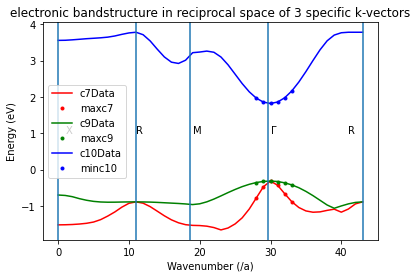

In [45]:
c7Data = CA2Data[:,6]
c9Data = CA2Data[:,8]
c10Data = CA2Data[:,9]

plt.figure(2)
#plotting the k-vector data from column 10
plt.plot(c7Data, color='r', label = 'c7Data')
#slicing the data points for c7Data around Γ and plotting the exatc points
maxc7 = np.column_stack(([28,29,30,31,32,33],c7Data[28:34]))
plt.plot(maxc7[:,0],maxc7[:,1], '.r', label = 'maxc7')

#plotting the k-vector data from column 9
plt.plot(c9Data, color='g', label = 'c9Data')
#slicing the data points for c7Data around Γ and plotting the exatc points
maxc9 = np.column_stack(([28,29,30,31,32,33],c9Data[28:34]))
plt.plot(maxc9[:,0],maxc9[:,1], '.g', label = 'maxc9')

#plotting the k-vector data from column 10
plt.plot(c10Data, color='b', label = 'c10Data')
#slicing the data points for c10Data around Γ and plotting the exatc points
minc10 = np.column_stack(([28,29,30,31,32,33],c10Data[28:34]))
plt.plot(minc10[:,0],minc10[:,1], '.b', label = 'minc10') 

#formatting
plt.axvline(x1)
plt.axvline(x2)
plt.axvline(x3)
plt.axvline(x4)
plt.axvline(x5)

plt.title('electronic bandstructure in reciprocal space of 3 specific k-vectors')
plt.xlabel('Wavenumber (/a)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.annotate('X',xy=(1,1))
plt.annotate('R',xy=(11,1))
plt.annotate('M',xy=(19,1))
plt.annotate('Γ',xy=(30,1))
plt.annotate('R',xy=(41,1))

In [35]:
#Quadratic function to describe the graph shape
def lobf(x, a,b,c):
  return (a*(x**2) + b*x + c)

Curve Fit Quadratic is of the form y =  0.03733928604194377 x^2 + -2.238096448578743 x +  35.35716459017781
Curve Fit Quadratic is of the form y =  -0.011053571147707737 x^2 + 0.6613821257240152 x +  -10.211164025246527
Curve Fit Quadratic is of the form y =  -0.07478571324384992 x^2 + 4.527328508052245 x +  -68.8884847532296


Text(41, 1, 'R')

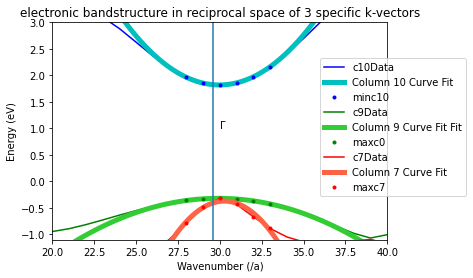

In [82]:

plt.figure(3)
'''
'''
plt.plot(c10Data, color='b', label = 'c10Data')
#slicing the data points for c10Data around Γ
minc10 = np.column_stack(([28,29,30,31,32,33],c10Data[28:34]))
#plt.plot(minc10[:,0],minc10[:,1], '.b', label = 'minc10') 

c10lobf_vars = [0.120, 460, 10] #variables coresponding to a, b and c
c10opt_vars, goodfit = s.curve_fit(lobf, minc10[:,0], minc10[:,1], c10lobf_vars) #fits a curve to the c7Data that was split

c10x = np.linspace(20, 40, num=1000) #creates array of x-axis data to generate the curve 
c10y = lobf(c10x, *c10opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(c10x, c10y, '-c', linewidth='5', label ='Column 10 Curve Fit')
print('Curve Fit Quadratic is of the form y = ', c10opt_vars[0], 'x^2 +', c10opt_vars[1], 'x + ', c10opt_vars[2])

plt.plot(minc10[:,0],minc10[:,1], '.b', label = 'minc10') 

'''
'''

plt.plot(c9Data, color='g', label = 'c9Data')
#slicing the data points for c9Data around Γ
maxc9 = np.column_stack(([28,29,30,31,32,33],c9Data[28:34]))
#plt.plot(maxc9[:,0],maxc9[:,1], '.g', label = 'maxc0') 

c9lobf_vars = [0.120, 460, 10] #variables coresponding to a, b and c
c9opt_vars, goodfit = s.curve_fit(lobf, maxc9[:,0], maxc9[:,1], c9lobf_vars) #fits a curve to the c7Data that was split

c9x = np.linspace(20, 40, num=1000) #creates array of x-axis data to generate the curve 
c9y = lobf(c9x, *c9opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(c9x, c9y, '#32CD32', linewidth='5', label ='Column 9 Curve Fit Fit')
print('Curve Fit Quadratic is of the form y = ', c9opt_vars[0], 'x^2 +', c9opt_vars[1], 'x + ', c9opt_vars[2])

plt.plot(maxc9[:,0],maxc9[:,1], '.g', label = 'maxc0') 

'''
'''

plt.plot(c7Data, color='r', label = 'c7Data') 
#slicing the data points for c7Data around Γ
maxc7 = np.column_stack(([28,29,30,31,32,33],c7Data[28:34]))
#plt.plot(maxc7[:,0],maxc7[:,1], '.r', label = 'maxc7') 

c7lobf_vars = [0.120, 460, 10] #variables coresponding to a, b and c
c7opt_vars, goodfit = s.curve_fit(lobf, maxc7[:,0],maxc7[:,1], c7lobf_vars) #fits a curve to the c7Data that was split

c7x = np.linspace(20, 40, num=1000) #creates array of x-axis data to generate the curve 
c7y = lobf(c7x, *c7opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(c7x, c7y, '#FF6347', linewidth='5', label ='Column 7 Curve Fit')
print('Curve Fit Quadratic is of the form y = ', c7opt_vars[0], 'x^2 +', c7opt_vars[1], 'x + ', c7opt_vars[2])

plt.plot(maxc7[:,0],maxc7[:,1], '.r', label = 'maxc7') 

#formatting
plt.axvline(x3)
plt.axvline(x4)
plt.axvline(x5)

plt.title('electronic bandstructure in reciprocal space of 3 specific k-vectors')
plt.xlabel('Wavenumber (/a)')
plt.ylabel('Energy (eV)')
plt.legend(loc=(0.8,0.2))
plt.xlim(20,40)
plt.ylim(-1.1,3)
plt.annotate('M',xy=(19,1))
plt.annotate('Γ',xy=(30,1))
plt.annotate('R',xy=(41,1))
